# Importing Libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,ShuffleSplit 
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import optuna
import pickle
import warnings
warnings.filterwarnings('ignore')

# Reading data

In [2]:
cols_list=['x_acc','y_acc','z_acc','label']
df1 = pd.read_csv("1.csv",header=None,names=cols_list)
df2 = pd.read_csv("2.csv",header=None,names=cols_list)
df3 = pd.read_csv("3.csv",header=None,names=cols_list)
df4 = pd.read_csv("4.csv",header=None,names=cols_list)
df5 = pd.read_csv("5.csv",header=None,names=cols_list)
df6 = pd.read_csv("6.csv",header=None,names=cols_list)
df7 = pd.read_csv("7.csv",header=None,names=cols_list)
df8 = pd.read_csv("8.csv",header=None,names=cols_list)
df9 = pd.read_csv("9.csv",header=None,names=cols_list)
df10 = pd.read_csv("10.csv",header=None,names=cols_list)
df11 = pd.read_csv("11.csv",header=None,names=cols_list)
df12 = pd.read_csv("12.csv",header=None,names=cols_list)
df13 = pd.read_csv("13.csv",header=None,names=cols_list)
df14 = pd.read_csv("14.csv",header=None,names=cols_list)
df15 = pd.read_csv("15.csv",header=None,names=cols_list)

In [3]:
df1['user_id']=1
df2['user_id']=2
df3['user_id']=3
df4['user_id']=4
df5['user_id']=5
df6['user_id']=6
df7['user_id']=7
df8['user_id']=8
df9['user_id']=9
df10['user_id']=10
df11['user_id']=11
df12['user_id']=12
df13['user_id']=13
df14['user_id']=14
df15['user_id']=15

In [4]:
df_final = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15])
print(df1.shape, df2.shape, df3.shape, df4.shape, df5.shape, df6.shape, df7.shape, df8.shape, df9.shape, df10.shape, df11.shape,df12.shape,df13.shape,df14.shape,df15.shape,df_final.shape)

(162501, 5) (138001, 5) (102341, 5) (122201, 5) (160001, 5) (140901, 5) (163001, 5) (138001, 5) (166741, 5) (126801, 5) (104451, 5) (114702, 5) (67651, 5) (116101, 5) (103501, 5) (1926896, 5)


In [5]:
df_final.head()

x_acc  y_acc  z_acc  label  user_id
0.0   1502   2215   2153      1        1
1.0   1667   2072   2047      1        1
2.0   1611   1957   1906      1        1
3.0   1601   1939   1831      1        1
4.0   1643   1965   1879      1        1

In [6]:
df_final.reset_index(inplace=True)
df_final.drop('index',axis=1,inplace=True)
df_final.head()

x_acc  y_acc  z_acc  label  user_id
0   1502   2215   2153      1        1
1   1667   2072   2047      1        1
2   1611   1957   1906      1        1
3   1601   1939   1831      1        1
4   1643   1965   1879      1        1

In [7]:
df_final.to_csv("all_users.csv")

In [8]:
len(df_final)

1926896

# Gathering Information

In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1926896 entries, 0 to 1926895
Data columns (total 5 columns):
 #   Column   Dtype
---  ------   -----
 0   x_acc    int64
 1   y_acc    int64
 2   z_acc    int64
 3   label    int64
 4   user_id  int64
dtypes: int64(5)
memory usage: 73.5 MB


In [10]:
df_final.describe()

x_acc         y_acc         z_acc         label       user_id
count  1.926896e+06  1.926896e+06  1.926896e+06  1.926896e+06  1.926896e+06
mean   1.987652e+03  2.382523e+03  1.970596e+03  3.882898e+00  7.512711e+00
std    1.113578e+02  1.003151e+02  9.445893e+01  2.443402e+00  4.172396e+00
min    2.820000e+02  2.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00
25%    1.904000e+03  2.337000e+03  1.918000e+03  1.000000e+00  4.000000e+00
50%    1.992000e+03  2.367000e+03  1.988000e+03  4.000000e+00  7.000000e+00
75%    2.076000e+03  2.413000e+03  2.032000e+03  7.000000e+00  1.100000e+01
max    3.828000e+03  4.095000e+03  4.095000e+03  7.000000e+00  1.500000e+01

# Data Preprocessing

## Checking and dropping duplicate values

In [11]:
df_final.duplicated().sum()

483018

In [12]:
df_final[(df_final.duplicated()) & (df_final['user_id']==1)]

x_acc  y_acc  z_acc  label  user_id
492      1964   2375   2127      1        1
494      1968   2373   2130      1        1
500      1964   2375   2127      1        1
530      1968   2371   2131      1        1
555      1966   2375   2127      1        1
...       ...    ...    ...    ...      ...
162488   1925   2383   2079      7        1
162491   1927   2383   2079      7        1
162492   1931   2388   2076      7        1
162494   1931   2386   2073      7        1
162498   1929   2385   2076      7        1

[53693 rows x 5 columns]

In [13]:
df_final.drop_duplicates(inplace=True,ignore_index=True)
df_final.head()

x_acc  y_acc  z_acc  label  user_id
0   1502   2215   2153      1        1
1   1667   2072   2047      1        1
2   1611   1957   1906      1        1
3   1601   1939   1831      1        1
4   1643   1965   1879      1        1

In [14]:
df_final.shape

(1443878, 5)

## Checking Missing values

In [15]:
df_final.isnull().sum()

x_acc      0
y_acc      0
z_acc      0
label      0
user_id    0
dtype: int64

## Handling multi-activities classes in the Label column

In [16]:
df_final['label'].value_counts()

7    422205
1    364860
4    349102
3    173288
5     46112
6     43596
2     41562
0      3153
Name: label, dtype: int64

In [22]:
# 2 --> 3,4,5
print("class 2 & 3",41562+173288)
print("class 2 & 4",41562+349102)
print("class 2 & 5",41562+46112)
print()
# 6 --> 4,7
print("class 6 & 4",43596+349102)
print("class 6 & 7",43596+422205)
print()
# 0 --> 5
print("class 0 & 5 after class 2 & 5",41562+46112+3153)

class 2 & 3 214850
class 2 & 4 390664
class 2 & 5 87674

class 6 & 4 392698
class 6 & 7 465801

class 0 & 5 after class 2 & 5 90827


In [23]:
# replacing class 0 and class 2 as class 5 respectively.
# replacing class 6 as class 4 respectively.

df_final['class'] = df_final['label']
df_final['class'] = [5 if x is 0 or x is 2 else 4 if x is 6 else x for x in df_final['class']]
df_final['class'].value_counts()

7    422205
4    392698
1    364860
3    173288
5     90827
Name: class, dtype: int64

In [24]:
df_final.shape

(1443878, 6)

In [25]:
df_final.head()

x_acc  y_acc  z_acc  label  user_id  class
0   1502   2215   2153      1        1      1
1   1667   2072   2047      1        1      1
2   1611   1957   1906      1        1      1
3   1601   1939   1831      1        1      1
4   1643   1965   1879      1        1      1

In [26]:
df_final['label'].value_counts()

7    422205
1    364860
4    349102
3    173288
5     46112
6     43596
2     41562
0      3153
Name: label, dtype: int64

In [27]:
df_final['class'].value_counts()

7    422205
4    392698
1    364860
3    173288
5     90827
Name: class, dtype: int64

In [29]:
df_final['label'].value_counts(normalize=True)

7    0.292410
1    0.252694
4    0.241781
3    0.120016
5    0.031936
6    0.030194
2    0.028785
0    0.002184
Name: label, dtype: float64

In [28]:
df_final['class'].value_counts(normalize=True)

7    0.292410
4    0.271975
1    0.252694
3    0.120016
5    0.062905
Name: class, dtype: float64

# Data Exploration

## Data Distribution

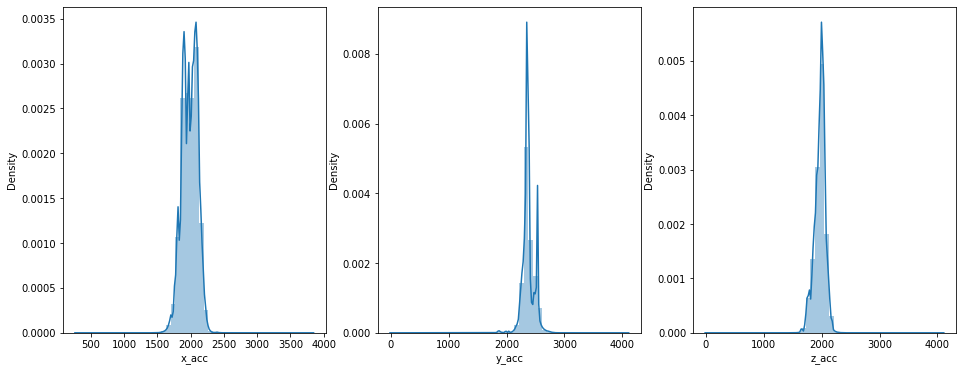

In [30]:
# checking distributions for x, y and z
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.distplot(df_final['x_acc'])

plt.subplot(1,3,2)
sns.distplot(df_final['y_acc'])

plt.subplot(1,3,3)
sns.distplot(df_final['z_acc'])
plt.show()

In [ ]:
# Most(~50%) of the x_acceleration lies in between 1700 and 2200
# Most(~50%) of the y_acceleration lies in between 2150 and 2700
# Most(~50%) of the z_acceleration lies in between 1800 and 2200

## Count of User Id

<AxesSubplot:xlabel='user_id', ylabel='count'>

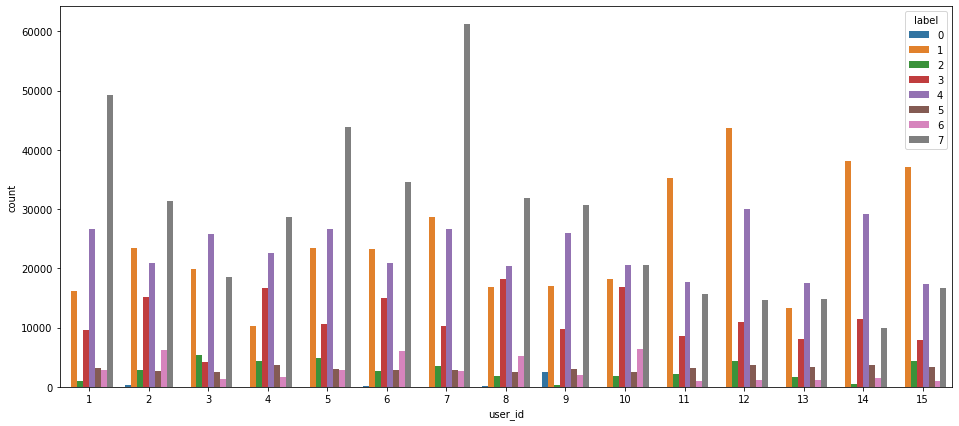

In [33]:
plt.figure(figsize=(16,7))
sns.countplot(x=df_final['user_id'],hue=df_final['label'])

<AxesSubplot:xlabel='user_id', ylabel='count'>

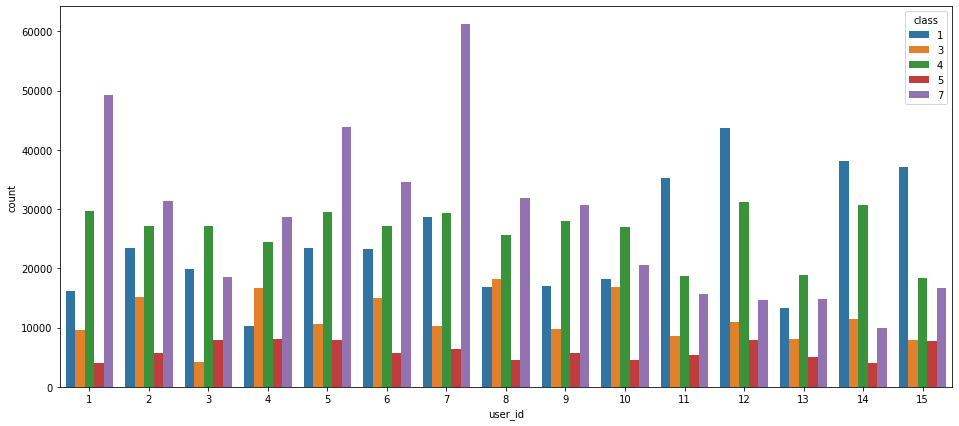

In [32]:
plt.figure(figsize=(16,7))
sns.countplot(x=df_final['user_id'],hue=df_final['class'])

In [34]:
df_final['user_id'].value_counts().sort_index()

1     108808
2     102916
3      77743
4      88100
5     115212
6     105794
7     135872
8      97130
9      91132
10     87043
11     83640
12    108540
13     60075
14     94210
15     87663
Name: user_id, dtype: int64

## Count of Label

<AxesSubplot:xlabel='class', ylabel='count'>

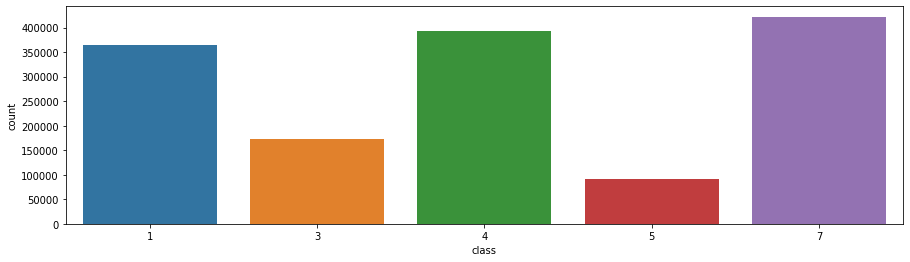

In [35]:
plt.figure(figsize=(15,4))
sns.countplot(x=df_final['class'])

In [36]:
df_final['class'].value_counts()

7    422205
4    392698
1    364860
3    173288
5     90827
Name: class, dtype: int64

In [37]:
df_final['class'].value_counts(normalize=True)

7    0.292410
4    0.271975
1    0.252694
3    0.120016
5    0.062905
Name: class, dtype: float64

## Relation between User Id and Label

In [38]:
pd.crosstab(df_final['user_id'],df_final['class'])

class        1      3      4     5      7
user_id                                  
1        16159   9576  29617  4107  49349
2        23396  15128  27206  5794  31392
3        19976   4145  27108  7916  18598
4        10276  16668  24416  8047  28693
5        23381  10531  29517  7917  43866
6        23321  15058  27129  5725  34561
7        28611  10302  29363  6430  61166
8        16860  18266  25674  4530  31800
9        17106   9696  27927  5723  30680
10       18155  16853  26913  4480  20642
11       35302   8670  18731  5315  15622
12       43678  11021  31267  7989  14585
13       13388   8076  18814  5019  14778
14       38152  11448  30636  4109   9865
15       37099   7850  18380  7726  16608

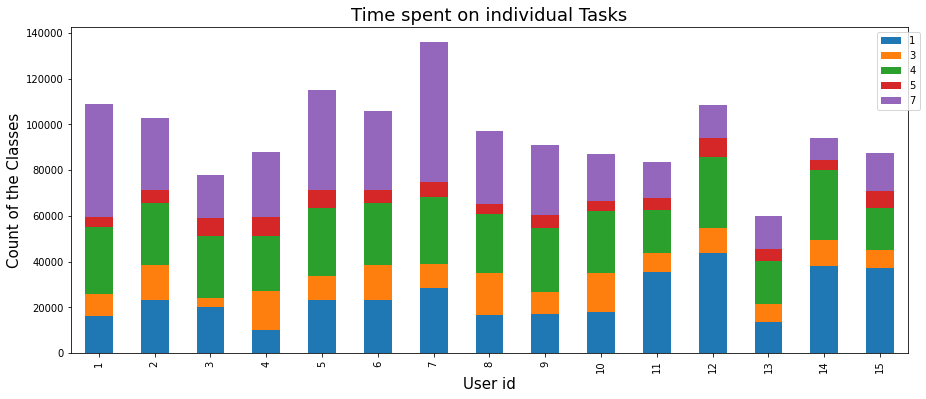

In [40]:
user_label_df = pd.crosstab(df_final['user_id'],df_final['class'])
user_label_df.plot(kind="bar",stacked=True,figsize=(15,6))
plt.legend(bbox_to_anchor=(1.02,1))
plt.title('Time spent on individual Tasks',fontsize=18)
plt.xlabel('User id',fontsize=15)
plt.ylabel('Count of the Classes',fontsize=15)
plt.show()

## Anomaly Detection

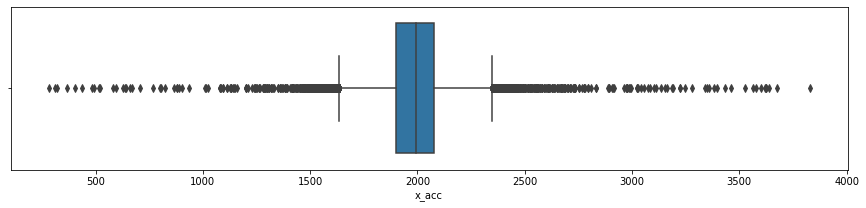

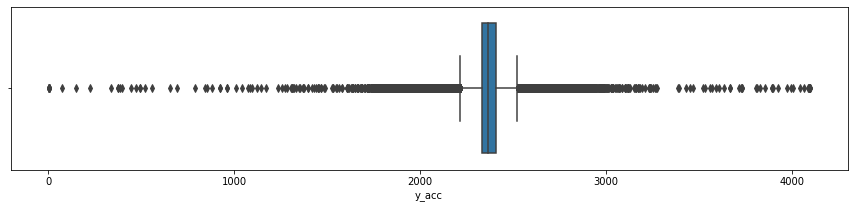

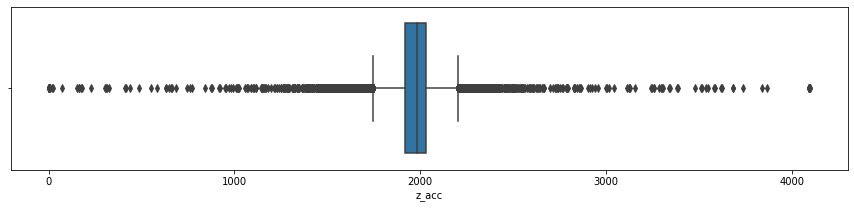

In [41]:
# checking distributions for x, y and z
plt.figure(figsize=(15,3))
#plt.subplot(3,1,1)
sns.boxplot(df_final['x_acc'])
plt.show()

plt.figure(figsize=(15,3))
#plt.subplot(3,2,2)
sns.boxplot(df_final['y_acc'])
plt.show()

plt.figure(figsize=(15,3))
#plt.subplot(3,3,3)
sns.boxplot(df_final['z_acc'])
plt.show()

In [ ]:
# Outliers are present in all 3 features - x_acceleration, y_acceleration, z_acceleration

## Correlation between features

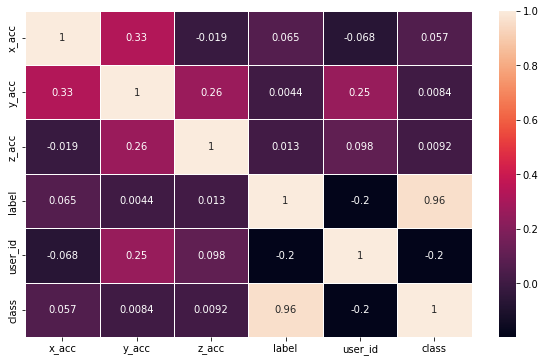

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(df_final.corr(),annot=True,linewidths=1);

# Splitting the data into X and Y

In [119]:
X = df_final.drop(['label','class','user_id'],axis=1)
y = df_final['class']

In [120]:
X.head(2)

x_acc  y_acc  z_acc
0   1502   2215   2153
1   1667   2072   2047

# Train Test Split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [122]:
train_indexes = X_train.index
test_indexes = X_test.index

In [123]:
X_train_in = X.loc[train_indexes]
X_test_in = X.loc[test_indexes]
y_train_in = y.loc[train_indexes]
y_test_in = y.loc[test_indexes]

In [124]:
len(X_train),len(X_test)

(1155102, 288776)

In [125]:
y_train_in.value_counts()

7    338198
4    313673
1    291972
3    138673
5     72586
Name: class, dtype: int64

In [126]:
y_test_in.value_counts()

7    84007
4    79025
1    72888
3    34615
5    18241
Name: class, dtype: int64

In [127]:
print("X_train shape: {}".format(X_train_in.shape))
print("y_train shape: {}".format(y_train_in.shape))
print("X_test shape: {}".format(X_test_in.shape))
print("y_test shape: {}".format(y_test_in.shape))

X_train shape: (1155102, 3)
y_train shape: (1155102,)
X_test shape: (288776, 3)
y_test shape: (288776,)


# Feature Scaling

In [128]:
sc=StandardScaler()
scaled_x_train=sc.fit_transform(X_train)
scaled_x_test=sc.transform(X_test)

# Model Building

## Decision Tree Classifier

In [129]:
X_train_res = scaled_x_train
y_train_res = y_train
X_test = scaled_x_test
y_test = y_test

In [155]:
dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 15, random_state= 2, splitter= 'best')
dt.fit(X_train_res,y_train_res.ravel())

DecisionTreeClassifier(max_depth=15, random_state=2)

In [156]:
y_test_dt = dt.predict(X_test)
y_train_dt = dt.predict(X_train_res)

In [157]:
acc_dt_train = dt.score(X_train_res,y_train_res)
print('Accuracy of the Decision Tree for Train data:',acc_dt_train)
acc_dt_test = dt.score(X_test,y_test)
print('Accuracy of the Decision Tree for Test data:',acc_dt_test)

Accuracy of the Decision Tree for Train data: 0.7034928517135284
Accuracy of the Decision Tree for Test data: 0.6812581377953847


In [158]:
print('Classification Report of the Decision Tree for Train data:')
print(classification_report(y_train_res,y_train_dt))

Classification Report of the Decision Tree for Train data:
              precision    recall  f1-score   support

           1       0.80      0.87      0.83    291972
           3       0.56      0.38      0.45    138673
           4       0.67      0.73      0.70    313673
           5       0.58      0.13      0.21     72586
           7       0.70      0.79      0.74    338198

    accuracy                           0.70   1155102
   macro avg       0.66      0.58      0.59   1155102
weighted avg       0.69      0.70      0.68   1155102



In [159]:
print('Classification Report of the Decision Tree for Test data:')
print(classification_report(y_test,y_test_dt))

Classification Report of the Decision Tree for Test data:
              precision    recall  f1-score   support

           1       0.78      0.85      0.82     72888
           3       0.51      0.35      0.42     34615
           4       0.65      0.70      0.67     79025
           5       0.43      0.09      0.15     18241
           7       0.68      0.78      0.73     84007

    accuracy                           0.68    288776
   macro avg       0.61      0.56      0.56    288776
weighted avg       0.66      0.68      0.66    288776



## Random Forest Model

In [223]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'gini', max_depth= 20, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 80, n_jobs= -1, random_state= 2, verbose= 2)
rf.fit(X_train_res,y_train_res)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 80building tree 2 of 80
building tree 3 of 80

building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.6s


building tree 38 of 80
building tree 39 of 80
building tree 40 of 80
building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=80, n_jobs=-1, random_state=2, verbose=2)

In [224]:
y_train_rf_predict = rf.predict(X_train_res)
y_test_rf_predict = rf.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.5s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:   17.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    3.8s finished


In [225]:
print('Accuracy of Train in Random Forest model:',rf.score(X_train_res,y_train_res))
print('Accuracy of Test in Random Forest model:',rf.score(X_test,y_test))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:   16.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


Accuracy of Train in Random Forest model: 0.7391901321268598


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.7s


Accuracy of Test in Random Forest model: 0.6937210848546971


[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    4.2s finished


In [226]:
print('Classification Report of the Random Forest for Train data:')
print(classification_report(y_train_res,y_train_rf_predict))

Classification Report of the Random Forest for Train data:
              precision    recall  f1-score   support

           1       0.83      0.88      0.85    291972
           3       0.64      0.41      0.50    138673
           4       0.70      0.78      0.74    313673
           5       0.72      0.14      0.23     72586
           7       0.73      0.84      0.78    338198

    accuracy                           0.74   1155102
   macro avg       0.72      0.61      0.62   1155102
weighted avg       0.73      0.74      0.72   1155102



In [227]:
print('Classification Report of the Random Forest for Test data:')
print(classification_report(y_test,y_test_rf_predict))

Classification Report of the Random Forest for Test data:
              precision    recall  f1-score   support

           1       0.80      0.86      0.83     72888
           3       0.56      0.35      0.43     34615
           4       0.65      0.73      0.69     79025
           5       0.53      0.09      0.16     18241
           7       0.68      0.79      0.73     84007

    accuracy                           0.69    288776
   macro avg       0.65      0.56      0.57    288776
weighted avg       0.68      0.69      0.67    288776



## XGBoost Classifier

In [198]:
xgb = XGBClassifier(booster= 'gbtree', learning_rate= 0.1, max_depth= 17, min_child_weight= 4, n_estimators= 100, n_jobs= -1, random_state= 2)
xgb.fit(X_train_res, y_train_res)

[17:12:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=17, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=2, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [199]:
y_train_xgb_p = xgb.predict(X_train_res)
y_test_xgb_p = xgb.predict(X_test)

In [200]:
print('Accuracy of Train in XGradient Boost model:',xgb.score(X_train_res,y_train_res))
print('Accuracy of Test in XGradient Boost model:',xgb.score(X_test,y_test))

Accuracy of Train in XGradient Boost model: 0.7539308216936687
Accuracy of Test in XGradient Boost model: 0.6906425741751392


In [201]:
print('Classification Report of the XGradient Boost for Train data:')
print(classification_report(y_train_res,y_train_xgb_p))

Classification Report of the XGradient Boost for Train data:
              precision    recall  f1-score   support

           1       0.84      0.89      0.86    291972
           3       0.66      0.45      0.53    138673
           4       0.72      0.80      0.76    313673
           5       0.73      0.24      0.36     72586
           7       0.74      0.84      0.78    338198

    accuracy                           0.75   1155102
   macro avg       0.74      0.64      0.66   1155102
weighted avg       0.75      0.75      0.74   1155102



In [202]:
print('Classification Report of the XGradient Boost for Test data:')
print(classification_report(y_test,y_test_xgb_p))

Classification Report of the XGradient Boost for Test data:
              precision    recall  f1-score   support

           1       0.80      0.85      0.83     72888
           3       0.54      0.35      0.43     34615
           4       0.65      0.72      0.68     79025
           5       0.43      0.13      0.20     18241
           7       0.69      0.78      0.73     84007

    accuracy                           0.69    288776
   macro avg       0.62      0.57      0.57    288776
weighted avg       0.67      0.69      0.67    288776



## Light Gradient Boost

In [213]:
lgb = LGBMClassifier(boosting_type= 'gbdt', learning_rate= 0.1, max_depth= 20, min_child_weight= 4, n_estimators= 80, n_jobs= -1, objective= 'multiclass', random_state= 2)
lgb.fit(X_train_res, y_train_res)

LGBMClassifier(max_depth=20, min_child_weight=4, n_estimators=80,
               objective='multiclass', random_state=2)

In [214]:
y_train_lgb_p = lgb.predict(X_train_res)
y_test_lgb_p = lgb.predict(X_test)

In [215]:
print('Accuracy of Train in Light Gradient Boost model:',lgb.score(X_train_res,y_train_res))
print('Accuracy of Test in Light Gradient Boost model:',lgb.score(X_test,y_test))

Accuracy of Train in Light Gradient Boost model: 0.6775670027408834
Accuracy of Test in Light Gradient Boost model: 0.6761434468238358


In [216]:
print('Classification Report of the Light Gradient Boost for Train data:')
print(classification_report(y_train_res,y_train_lgb_p))

Classification Report of the Light Gradient Boost for Train data:
              precision    recall  f1-score   support

           1       0.77      0.85      0.81    291972
           3       0.56      0.29      0.39    138673
           4       0.66      0.68      0.67    313673
           5       0.60      0.05      0.09     72586
           7       0.65      0.81      0.72    338198

    accuracy                           0.68   1155102
   macro avg       0.65      0.54      0.53   1155102
weighted avg       0.67      0.68      0.65   1155102



In [217]:
print('Classification Report of the Light Gradient Boost for Test data:')
print(classification_report(y_test,y_test_lgb_p))

Classification Report of the Light Gradient Boost for Test data:
              precision    recall  f1-score   support

           1       0.76      0.86      0.81     72888
           3       0.56      0.29      0.38     34615
           4       0.66      0.68      0.67     79025
           5       0.58      0.05      0.08     18241
           7       0.65      0.81      0.72     84007

    accuracy                           0.68    288776
   macro avg       0.64      0.54      0.53    288776
weighted avg       0.66      0.68      0.65    288776



# Model Performance

In [228]:
def evalute_metrics(model_name,model,train_X,train_y,predict_X,predict_y):#metrics=rmse,wape,mae
    if model_name == 'rfc':
        train_y_rfc = model.predict(train_X)
        predict_y_rfc = model.predict(predict_X)
        
        rf_train_acc = round(accuracy_score(train_y,train_y_rfc),2)
        rf_train_recall = round(recall_score(train_y,train_y_rfc,pos_label=1,average='weighted'),2)
        rf_train_precision = round(precision_score(train_y,train_y_rfc,pos_label=1,average='weighted'),2)
        rf_train_f1score = round(f1_score(train_y,train_y_rfc,pos_label=1,average='weighted'),2)
        
        rf_test_acc = round(accuracy_score(predict_y,predict_y_rfc),2)
        rf_test_recall = round(recall_score(predict_y,predict_y_rfc,pos_label=1,average='weighted'),2)
        rf_test_precision = round(precision_score(predict_y,predict_y_rfc,pos_label=1,average='weighted'),2)
        rf_test_f1score = round(f1_score(predict_y,predict_y_rfc,pos_label=1,average='weighted'),2)
        
        return pd.Series([rf_train_acc,rf_test_acc,rf_train_recall,rf_test_recall,rf_train_precision,rf_test_precision,rf_train_f1score,rf_test_f1score])
   

    elif model_name == 'xgb':
        train_y_xgb = model.predict(train_X)
        predict_y_xgb = model.predict(predict_X)
        
        xgb_train_acc = round(accuracy_score(train_y,train_y_xgb),2)
        xgb_train_recall = round(recall_score(train_y,train_y_xgb,pos_label=1,average='weighted'),2)
        xgb_train_precision = round(precision_score(train_y,train_y_xgb,pos_label=1,average='weighted'),2)
        xgb_train_f1score = round(f1_score(train_y,train_y_xgb,pos_label=1,average='weighted'),2)
        
        xgb_test_acc = round(accuracy_score(predict_y,predict_y_xgb),2)
        xgb_test_recall = round(recall_score(predict_y,predict_y_xgb,pos_label=1,average='weighted'),2)
        xgb_test_precision = round(precision_score(predict_y,predict_y_xgb,pos_label=1,average='weighted'),2)
        xgb_test_f1score = round(f1_score(predict_y,predict_y_xgb,pos_label=1,average='weighted'),2)
        
        return pd.Series([xgb_train_acc,xgb_test_acc,xgb_train_recall,xgb_test_recall,xgb_train_precision,xgb_test_precision,xgb_train_f1score,xgb_test_f1score])

    
    elif model_name == 'dtc':
        train_y_dtc = model.predict(train_X)
        predict_y_dtc = model.predict(predict_X)
        
        dtc_train_acc = round(accuracy_score(train_y,train_y_dtc),2)
        dtc_train_recall = round(recall_score(train_y,train_y_dtc,pos_label=1,average='weighted'),2)
        dtc_train_precision = round(precision_score(train_y,train_y_dtc,pos_label=1,average='weighted'),2)
        dtc_train_f1score = round(f1_score(train_y,train_y_dtc,pos_label=1,average='weighted'),2)
        
        dtc_test_acc = round(accuracy_score(predict_y,predict_y_dtc),2)
        dtc_test_recall = round(recall_score(predict_y,predict_y_dtc,pos_label=1,average='weighted'),2)
        dtc_test_precision = round(precision_score(predict_y,predict_y_dtc,pos_label=1,average='weighted'),2)
        dtc_test_f1score = round(f1_score(predict_y,predict_y_dtc,pos_label=1,average='weighted'),2)
        
        return pd.Series([dtc_train_acc,dtc_test_acc,dtc_train_recall,dtc_test_recall,dtc_train_precision,dtc_test_precision,dtc_train_f1score,dtc_test_f1score])
    
    elif model_name == 'lgb':
        train_y_lgb = model.predict(train_X)
        predict_y_lgb = model.predict(predict_X)
        
        lgb_train_acc = round(accuracy_score(train_y,train_y_lgb),2)
        lgb_train_recall = round(recall_score(train_y,train_y_lgb,pos_label=1,average='weighted'),2)
        lgb_train_precision = round(precision_score(train_y,train_y_lgb,pos_label=1,average='weighted'),2)
        lgb_train_f1score = round(f1_score(train_y,train_y_lgb,pos_label=1,average='weighted'),2)
        
        lgb_test_acc = round(accuracy_score(predict_y,predict_y_lgb),2)
        lgb_test_recall = round(recall_score(predict_y,predict_y_lgb,pos_label=1,average='weighted'),2)
        lgb_test_precision = round(precision_score(predict_y,predict_y_lgb,pos_label=1,average='weighted'),2)
        lgb_test_f1score = round(f1_score(predict_y,predict_y_lgb,pos_label=1,average='weighted'),2)
        
        return pd.Series([lgb_train_acc,lgb_test_acc,lgb_train_recall,lgb_test_recall,lgb_train_precision,lgb_test_precision,lgb_train_f1score,lgb_test_f1score])
    

## ML Evaluation

In [229]:
[dtc_train_acc,dtc_test_acc,dtc_train_recall,dtc_test_recall,dtc_train_precision,dtc_test_precision,dtc_train_f1score,dtc_test_f1score]=evalute_metrics('dtc',dt,X_train_res,y_train_res,X_test,y_test)
[rf_train_acc,rf_test_acc,rf_train_recall,rf_test_recall,rf_train_precision,rf_test_precision,rf_train_f1score,rf_test_f1score]=evalute_metrics('rfc',rf,X_train_res,y_train_res,X_test,y_test)
[lgb_train_acc,lgb_test_acc,lgb_train_recall,lgb_test_recall,lgb_train_precision,lgb_test_precision,lgb_train_f1score,lgb_test_f1score]=evalute_metrics('lgb',lgb,X_train_res,y_train_res,X_test,y_test)
[xgb_train_acc,xgb_test_acc,xgb_train_recall,xgb_test_recall,xgb_train_precision,xgb_test_precision,xgb_train_f1score,xgb_test_f1score]=evalute_metrics('xgb',xgb,X_train_res,y_train_res,X_test,y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:   15.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    4.1s finished


In [230]:
df_res = pd.DataFrame(data = [[rf_train_acc,rf_train_recall,rf_train_precision,rf_train_f1score],
                              [rf_test_acc,rf_test_recall,rf_test_precision,rf_test_f1score],
                              [dtc_train_acc,dtc_train_recall,dtc_train_precision,dtc_train_f1score],
                              [dtc_test_acc,dtc_test_recall,dtc_test_precision,dtc_test_f1score],
                              [xgb_train_acc,xgb_train_recall,xgb_train_precision,xgb_train_f1score],
                              [xgb_test_acc,xgb_test_recall,xgb_test_precision,xgb_test_f1score],
                              [lgb_train_acc,lgb_train_recall,lgb_train_precision,lgb_train_f1score],
                              [lgb_test_acc,lgb_test_recall,lgb_test_precision,lgb_test_f1score],
                              ],
                   index=['RF Train', 'RF Test', 'DT Train', 'DT Test', 'XGB Train', 'XGB Test', 'LGBM Train', 'LGBM Test'],
                   columns=['ACCURACY','RECALL','PRECISION','F1SCORE'])
round(df_res,2)

ACCURACY  RECALL  PRECISION  F1SCORE
RF Train        0.74    0.74       0.73     0.72
RF Test         0.69    0.69       0.68     0.67
DT Train        0.70    0.70       0.69     0.68
DT Test         0.68    0.68       0.66     0.66
XGB Train       0.75    0.75       0.75     0.74
XGB Test        0.69    0.69       0.67     0.67
LGBM Train      0.68    0.68       0.67     0.65
LGBM Test       0.68    0.68       0.66     0.65

# Creating pickle file

In [238]:
import pickle
filename='Activity_Recognition_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [239]:
model_data = pickle.load(open("Activity_Recognition_model.pkl", "rb" ) )
model_data

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=80, n_jobs=-1, random_state=2, verbose=2)